ref1: <https://github.com/codebasics/py/blob/master/ML/7_logistic_reg/Exercise/7_logistic_regression_exercise.ipynb>
<br>ref2: <https://www.kaggle.com/code/lightonkalumba/hr-analysis-logistic-regression/notebook>
<br>ref3: <https://www.kaggle.com/datasets/giripujar/hr-analytics?resource=download>

Goal: To identify the factors contribute to the employee turnover. Creating Logistic regression model to predict whether an employee is going to stay or leave a company.
<br> The target variable will be `left : YES or NO`

## Import Libraries

In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline
from IPython.display import display, HTML
import statsmodels.api as sm

## Load Data and Preprocessing

In [342]:
# Function to create scrollable table within small window

In [343]:
df=pd.read_csv('D:/NF/ML/Logistic Regression/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [344]:
# Descriptive Statistics

numerical_features = df.select_dtypes(include=[np.number])
summary_stats= numerical_features.describe()
summary_stats

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [345]:
# Check for Missing Value

null_value = df.isnull().sum()
null_value

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

The dataset does not contain any missing value

## Exploratory Data Analysis (EDA)

### Percentage of Employee Left Company or Not

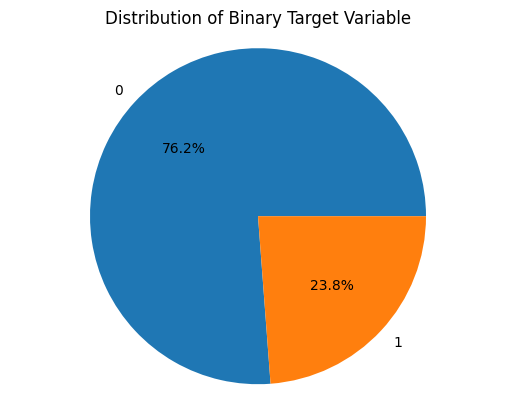

In [346]:
# Pie chart for the employee left or not

target_counts = df['left'].value_counts()

plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Binary Target Variable')
plt.show()

### Impact of Satisfaction Level on the Employee Retention

Text(0.5, 1.0, 'Satisfaction Level vs Employee Retention')

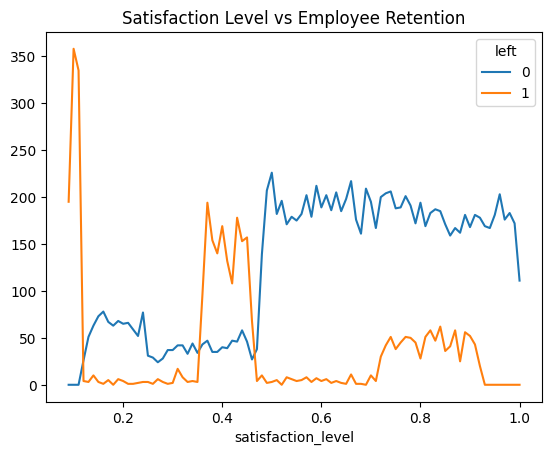

In [347]:
pd.crosstab(df.satisfaction_level, df.left).plot(kind='line')
plt.title('Satisfaction Level vs Employee Retention')

From the line chart abone, when the higher the satisfaction level, the employee tend to retain

### Impact of Salary on Employeed Retention

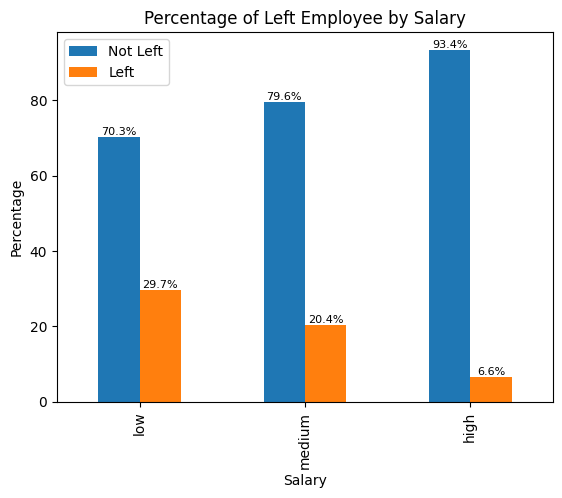

In [348]:
cross_tab = pd.crosstab(df.salary, df.left)

#calculate percentage values
pCross_tab = cross_tab.apply(lambda x: x / x.sum() * 100, axis=1)

# Define the desired order of the x-axis categories
custom_order = ['low', 'medium', 'high']

# Reindex the cross-tabulation table
pCross_tab = pCross_tab.reindex(custom_order)

# plot the bar chart with percentage values
ax = pCross_tab.plot(kind='bar', stacked=False)
ax.legend(['Not Left', 'Left'])
ax.set_ylabel('Percentage')
ax.set_xlabel('Salary')
ax.set_title('Percentage of Left Employee by Salary')

# Add percentage values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8)

plt.show()

From the bar chart above, the employee tend to stay in the company when the salary is high.

### Impact of Promotion Last 5 Years on Employee Retention

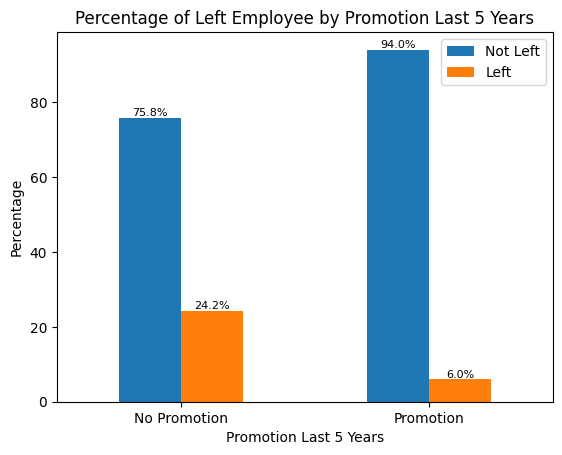

In [349]:
cross_tab = pd.crosstab(df.promotion_last_5years, df.left)

#calculate percentage values
pCross_tab = cross_tab.apply(lambda x: x / x.sum() * 100, axis=1)

categories = ['0', '1']

# plot the bar chart with percentage values
ax = pCross_tab.plot(kind='bar', stacked=False)
ax.legend(['Not Left', 'Left'])
ax.set_ylabel('Percentage')
ax.set_xlabel('Promotion Last 5 Years')
ax.set_title('Percentage of Left Employee by Promotion Last 5 Years')

# Change the x-axis labels
plt.xticks(range(len(categories)), ['No Promotion', 'Promotion'], rotation=360)

# Add percentage values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8)

plt.show()

Whether there is promotion or not, the employee tend to retain at the company. So the promotion does not give any impact to the employee attrition from the company

### Impact of Work Accident on the Employee Attrition

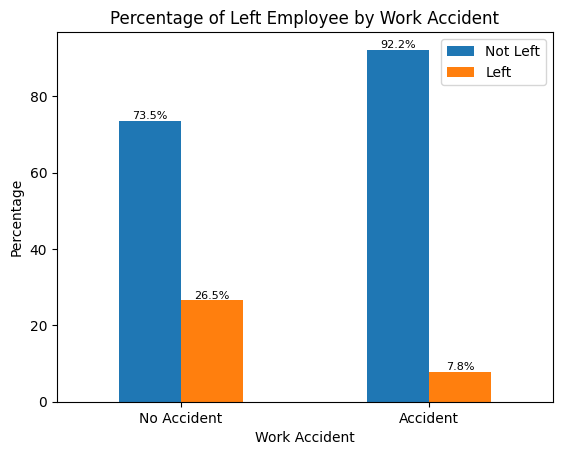

In [350]:
cross_tab = pd.crosstab(df.Work_accident, df.left)

#calculate percentage values
pCross_tab = cross_tab.apply(lambda x: x / x.sum() * 100, axis=1)

categories = ['0', '1']

# plot the bar chart with percentage values
ax = pCross_tab.plot(kind='bar', stacked=False)
ax.legend(['Not Left', 'Left'])
ax.set_ylabel('Percentage')
ax.set_xlabel('Work Accident')
ax.set_title('Percentage of Left Employee by Work Accident')

# Change the x-axis labels
plt.xticks(range(len(categories)), ['No Accident', 'Accident'], rotation=360)

# Add percentage values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8)

plt.show()

The employee tend to stay in the company whether thare is accident occur or not. 

### Impact of Time Spent in Company to Employee Attrition

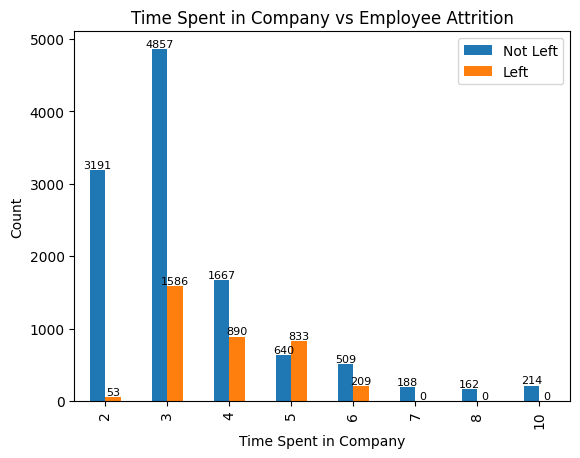

In [351]:
crosstab_data = pd.crosstab(df.time_spend_company, df.left)
ax = crosstab_data.plot(kind = 'bar')

ax.legend(['Not Left','Left'])

plt.title('Time Spent in Company vs Employee Attrition')
plt.xlabel('Time Spent in Company')
plt.ylabel('Count')

# Add count numbers on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8)

plt.show()

The employee who spent the most time at work didn't leave

### Impact of Deparment on Employee Attrition

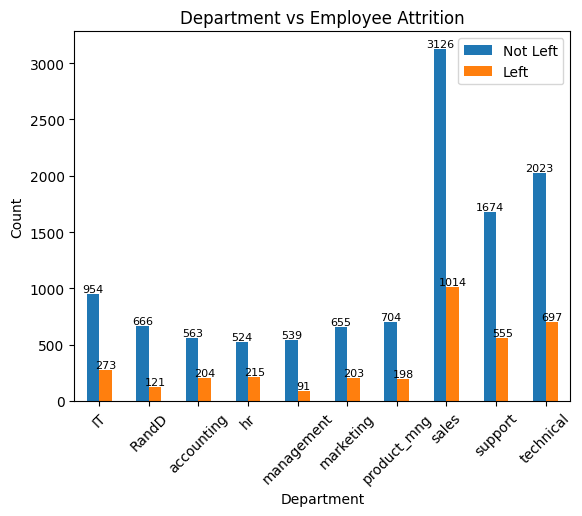

In [352]:
crosstab_data = pd.crosstab(df.Department, df.left)
ax = crosstab_data.plot(kind = 'bar')

ax.legend(['Not Left','Left'])

plt.title('Department vs Employee Attrition')
plt.xticks(rotation =45)
plt.xlabel('Department')
plt.ylabel('Count')

# Add count numbers on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8)

plt.show()

The employee from the Sales Department tend to leave their jobs

### Impact of Average Monthly Hours of Working tp Employee Attrition

Text(0.5, 1.0, 'Average Monthly Hours vs Employee Retention')

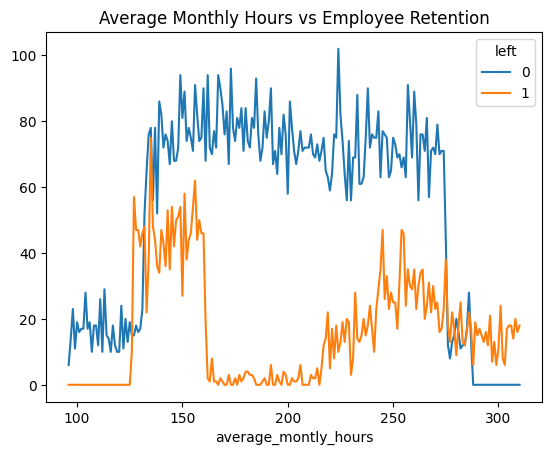

In [353]:
pd.crosstab(df.average_montly_hours, df.left).plot(kind='line')
plt.title('Average Monthly Hours vs Employee Retention')

The longest

### Plot Heatmap of the Data

Check correlation

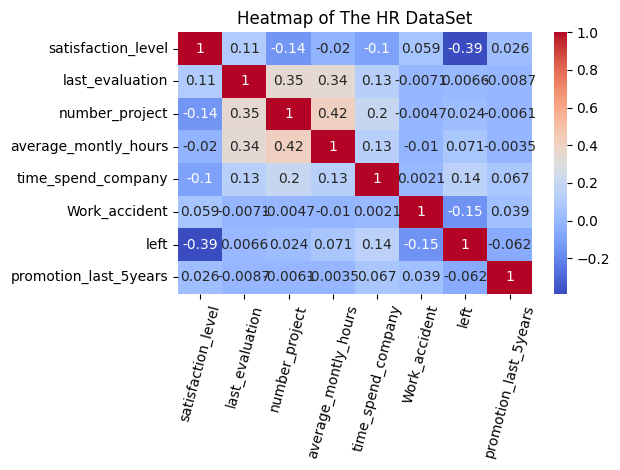

In [354]:
data_matrix = numerical_features.corr()  

sns.heatmap(data_matrix, cmap='coolwarm', annot=True)

plt.xticks(rotation = 75)
plt.yticks(rotation = 0)
plt.title('Heatmap of The HR DataSet')

plt.tight_layout()

plt.show()

Based on heatmap, it shows that `last_evaluation`, `number_project`, and `average_monthly_hours` have high collinearity among themselves

### Check Multicollinearity

In [355]:
# Extract numerical variables

numeric_x=df.select_dtypes(include='number')
numeric_x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [356]:
# Drop the dependent variable - `left`

numeric_x=numeric_x.drop(['left'], axis=1)

In [357]:
numeric_x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


In [358]:
#check multicollinearity using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data['feature'] = numeric_x.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_x.values, i)
                                             for i in range(len(numeric_x.columns))]
vif_data

,feature,VIF
0,satisfaction_level,6.186601
1,last_evaluation,19.990183
2,number_project,13.793659
3,average_montly_hours,18.918397
4,time_spend_company,6.550547
5,Work_accident,1.172189
6,promotion_last_5years,1.029476


`last_evaluation`, `number_project`, and `average_monthly_hours` are far above the VIF threshold, indicating gthe there is high collinearity between this variables. The value should be below VIF which is 10

## Feature Engineering

In [359]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [360]:
subdf = df[['satisfaction_level', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary']]
subdf.head()

,satisfaction_level,time_spend_company,Work_accident,promotion_last_5years,salary
0,0.38,3,0,0,low
1,0.80,6,0,0,medium
2,0.11,4,0,0,medium
3,0.72,5,0,0,low
4,0.37,3,0,0,low


### Handling Outliers

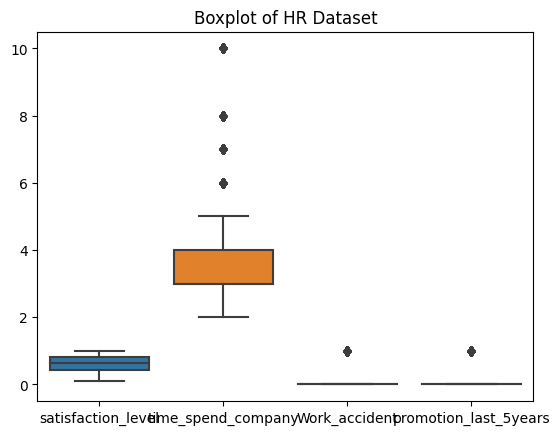

In [361]:
# Plot boxplot for each feature
sns.boxplot(data=subdf)
plt.title('Boxplot of HR Dataset')
plt.show()

Old Shape:  (14999, 5)
New Shape:  (14999, 5)


C:\Users\farisha.krishnan\AppData\Local\Temp\ipykernel_17800\4150793997.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(subdf['time_spend_company'], 25,
C:\Users\farisha.krishnan\AppData\Local\Temp\ipykernel_17800\4150793997.py:7: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(subdf['time_spend_company'],75,


<Axes: xlabel='time_spend_company'>

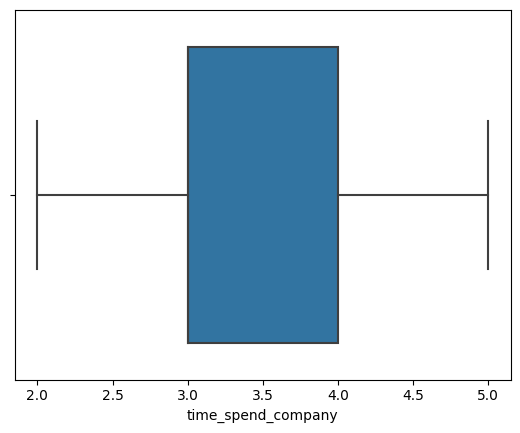

In [362]:
# handling the outliers
# Detect the outliers using IQR 

#IQR
Q1 = np.percentile(subdf['time_spend_company'], 25,
                   interpolation='midpoint')
Q3 = np.percentile(subdf['time_spend_company'],75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print("Old Shape: ", subdf.shape)


# Define outlier boundaries
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Identify outliers
outliers = (subdf['time_spend_company'] < lower_bound) | (subdf['time_spend_company'] > upper_bound)

# Replace outliers with the mean value of the 'SepalWidthCm' column
subdf.loc[outliers, 'time_spend_company'] = np.mean(subdf['time_spend_company'])

print("New Shape: ",subdf.shape)

sns.boxplot(x='time_spend_company', data=subdf)

### Create Dummy

Salary is a string that contains category for 'high', 'medium', 'low'
<br> Needs to be converted to numbers and dummy variables will be used for that

In [363]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [364]:
salary_dummies= pd.get_dummies(subdf['salary'], dtype=int) #dtypes is used to encode 0 and 1
new_df= pd.concat([subdf, salary_dummies], axis='columns')
new_df.head()

,satisfaction_level,time_spend_company,Work_accident,promotion_last_5years,salary,high,low,medium
0,0.38,3.000000,0,0,low,0,1,0
1,0.80,3.498233,0,0,medium,0,0,1
2,0.11,4.000000,0,0,medium,0,0,1
3,0.72,5.000000,0,0,low,0,1,0
4,0.37,3.000000,0,0,low,0,1,0


In [365]:
new_df.drop('salary', axis='columns', inplace=True)
new_df.head()

,satisfaction_level,time_spend_company,Work_accident,promotion_last_5years,high,low,medium
0,0.38,3.000000,0,0,0,1,0
1,0.80,3.498233,0,0,0,0,1
2,0.11,4.000000,0,0,0,0,1
3,0.72,5.000000,0,0,0,1,0
4,0.37,3.000000,0,0,0,1,0


In [366]:
X = new_df
X.head()

,satisfaction_level,time_spend_company,Work_accident,promotion_last_5years,high,low,medium
0,0.38,3.000000,0,0,0,1,0
1,0.80,3.498233,0,0,0,0,1
2,0.11,4.000000,0,0,0,0,1
3,0.72,5.000000,0,0,0,1,0
4,0.37,3.000000,0,0,0,1,0


In [367]:
y = df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

## Build the Model

In [368]:
# Split data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.7, random_state=42)

In [369]:
model = LogisticRegression()

In [370]:
# modelling the Logistic Regression

model.fit(X_train, y_train)

LogisticRegression()

In [371]:
y_pred= model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Fit the Logsitic Regression

In [372]:
# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.406262
         Iterations 7


In [373]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   left   No. Observations:                14999
Model:                          Logit   Df Residuals:                    14992
Method:                           MLE   Df Model:                            6
Date:                Thu, 06 Jul 2023   Pseudo R-squ.:                  0.2598
Time:                        13:36:07   Log-Likelihood:                -6093.5
converged:                       True   LL-Null:                       -8232.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
satisfaction_level       -3.5187      0.094    -37.534      0.000      -3.702      -3.335
time_spend_company        0.9017      0.027     33.395      0.000       0.849       0.955
Work_accident            -1.5968      0.093    -17.146      0.000      -1.779      -1.414
promotion_last_5years    -1.2574      0.258     -4.881      0.000      -1.762      -0.753
high                     -3.5904      0.162    -22.099      0.000      -3.909      -3.272
low                      -1.7355      0.108    -16.039      0.000      -1.948      -1.523
medium                   -2.2646      0.111    -20.409      0.000      -2.482      -2.047
=========================================================================================
"""

Based on the p-value only the medium salary not significant with the employee attrition

## Model Evaluation

### Plot the Receiver Operating Characteristic (ROC) curve 

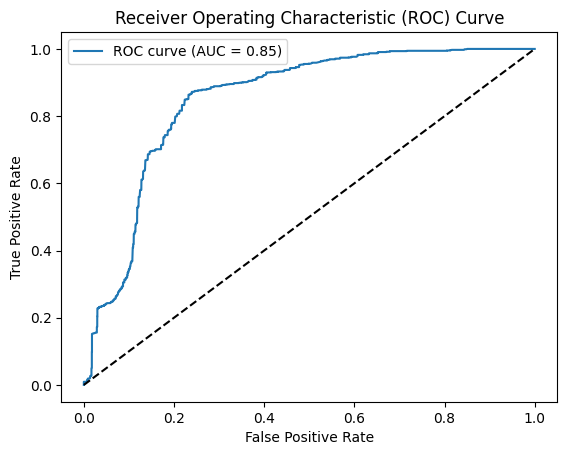

In [374]:
from sklearn.metrics import roc_curve, roc_auc_score 



# Predict probabilities for the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

The closer the ROC curve is to the top-left corner, the better the model's performance.

### Classification Table

In [375]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a classification table
classification_table = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print(classification_table)

                 Predicted Negative  Predicted Positive
Actual Negative                3149                 279
Actual Positive                 767                 305


In [376]:
model.score(X_test, y_test)

0.7675555555555555